This notebook is in progress as a group work in class. 

In [16]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#set parameter values: Do not forget to define the values as integers (0.0)
beta = 0.95
ro = 1.1
sigma = 2.0 
w1 = 8.0

In [9]:
def uprime(c, sigma):
    '''
    This function is used to define marginal utility function.
    Utility function:
        u = (c**(1-sigma)-1)/(1-sigma) if sigma!=1 & sigma>0
        u = ln(c) if sigma=1
    Arguments = consumption (c) and risk aversity (sigma)
    '''
    mu = (c**(-sigma))
    return mu

def upp(c, sigma):
    '''
    This function is used to determine second derivitive of the utility function (u double prime).
    Arguments = Consumption (c) and risk aversity (sigma)
    '''
    dmu = -sigma*c**(-sigma-1)
    return dmu

def foc(s, ro, sigma, beta, w1):
    '''
    This function defines the first order condition, used to find s(w1).
    '''
    error = uprime(w1-s, sigma) - beta*ro*uprime(ro*s, sigma)
    return error

In [10]:
s0 = 0.1
# documents for rootfinder: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root
results = opt.root(foc, s0, args = (ro, sigma, beta, w1), method='hybr', jac=None, tol=None, callback=None, options=None)
results

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([1.53823343e-11])
       r: array([-0.05823875])
  status: 1
 success: True
       x: array([3.85346213])

In [11]:
# To test the accuracy of the results
(beta*w1)/(1+beta)

3.8974358974358974

In [12]:
beta = 0.95
ro = 1.1
epsilon = 0.1
sigma = 2.0 
w1 = 8.0
s0 = 0.1
# documents for rootfinder: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root
results = opt.root(foc, s0, args = (ro+epsilon, sigma, beta, w1), method='hybr', jac=None, tol=None, callback=None, options=None)
results

    fjac: array([[-1.]])
     fun: array([-6.9388939e-18])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([2.2803974e-11])
       r: array([-0.05599024])
  status: 1
 success: True
       x: array([3.76665041])

In [ ]:
# less amount as expected

In [13]:
beta = 0.95
ro = 1.1
epsilon = 0.001
sigma = 2.0 
w1 = 8.0
s0 = 0.1
# documents for rootfinder: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root
results = opt.root(foc, s0, args = (ro+epsilon, sigma, beta, w1), method='hybr', jac=None, tol=None, callback=None, options=None)
results

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([1.54800062e-11])
       r: array([-0.05821424])
  status: 1
 success: True
       x: array([3.85255468])

In [18]:
sigma_list = list(np.linspace(0.5, 4, 500)) 
d=[] 
#d = np.zeros[len(sigma-list)]
for i,v in enumerate(sigma_list):
    results1 = opt.root(foc, s0, args = (ro, v, beta, w1), method='hybr', jac=None, tol=None, callback=None, options=None)
    results2 = opt.root(foc, s0, args = (ro+epsilon, v, beta, w1), method='hybr', jac=None, tol=None, callback=None, options=None)
    s1 = results1["x"]
    s2 = results2["x"]
    d.append((s2 - s1)/epsilon)
    
print(d)

[array([1.8173347]), array([1.76704462]), array([1.71812619]), array([1.67052412]), array([1.62418609]), array([1.57906249]), array([1.53510629]), array([1.49227282]), array([1.45051968]), array([1.40980658]), array([1.37009518]), array([1.33134903]), array([1.29353341]), array([1.25661523]), array([1.22056297]), array([1.18534656]), array([1.1509373]), array([1.11730779]), array([1.08443186]), array([1.05228448]), array([1.02084174]), array([0.99008074]), array([0.95997958]), array([0.93051727]), array([0.90167372]), array([0.87342964]), array([0.84576658]), array([0.81866679]), array([0.79211326]), array([0.76608967]), array([0.74058031]), array([0.71557011]), array([0.69104457]), array([0.66698976]), array([0.64339226]), array([0.62023917]), array([0.59751805]), array([0.57521695]), array([0.55332432]), array([0.53182907]), array([0.51072048]), array([0.4899882]), array([0.46962229]), array([0.44961312]), array([0.4299514]), array([0.41062818]), array([0.39163478]), array([0.3729628

<IPython.core.display.Javascript object>


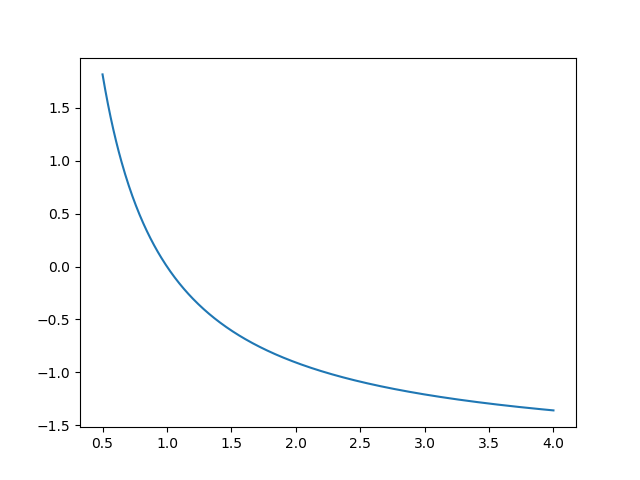

In [19]:
plt.plot(sigma_list, d)